In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [38]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%precision %.5f
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tools

In [29]:
from tools.graphics import as_si, make_grid, plot_data, plot_frontiere, plot_cov_ellipse
from tools.mixture import K_means, GM

# Constants

In [5]:
DATA_DIR = "data/"
COLS = ["red", "blue","green", "orange", "black", "cyan"]
MARKS = ["^","+","*","o","x","."]

## Reading data

In [6]:
D = {}
for t in ["data", "test"]:
    D[t] = pd.read_csv(DATA_DIR + "EMGaussian" + "." + t, sep = ' ', names = ["x1", "x2"])

# Saving mixutre parameters

In [96]:
n_iter = 10000

# Train data
datax = D['data'].as_matrix()
K = 4

# List to save results
likelihood = []
Cen = {0 : [], 1 : [], 2 : [], 3 : []}
Sigma = {0 : [], 1 : [], 2 : [], 3 : []}

# Iterate over n_iter times
for k in tqdm(range(int(n_iter))):
    classifier = GM(K)
    # Fit the classifier
    classifier.fit(datax)
    A = classifier.q.argmax(axis = 0).astype(int)
    C = classifier.mu.reshape(K, 2)
    for i,j in enumerate(np.arctan2(C[:, 0], C[:, 1]).argsort()):
        Cen[i].append(C[j])
        Sigma[i].append(classifier.sigma[j])
        
    likelihood.append(classifier.L[-1])

print ("Moyenne de vraissemblance : {} - et écart-type : {}"\
       .format(np.mean(likelihood),np.std(likelihood)))
for k in Cen.keys():
    Cen[k] = np.array(Cen[k])
    print ("----- Centroide 1 -----")
    print ("moyenne  : {}\nécart-type : {}"\
       .format(np.mean(Cen[k], axis = 0), np.std(Cen[k], axis = 0)))

100%|██████████| 10000/10000 [03:43<00:00, 44.84it/s]

Moyenne de vraissemblance : -2328.5539929712804 - et écart-type : 6.721229175046616
----- Centroide 1 -----
moyenne  : [-3.0613271  -3.53394026]
écart-type : [ 0.0133114   0.01252042]
----- Centroide 1 -----
moyenne  : [-2.04756726  4.16195654]
écart-type : [ 0.11140972  0.09011193]
----- Centroide 1 -----
moyenne  : [ 3.90500456  3.85260359]
écart-type : [ 0.6250401   0.12733416]
----- Centroide 1 -----
moyenne  : [ 3.80065165 -3.71048669]
écart-type : [ 0.0089416   0.53683121]


In [114]:
# Better result = better likelihood
best = np.array(likelihood).argmax()

# Dictionary of best parameters
best_params = {"mu" : np.array([Cen[i][best] for i in Cen.keys()]),
               "sigma": np.array([Sigma[i][best] for i in Sigma.keys()])}

# Save in binary file
np.save("mixture_parameters", best_params)

# Load parameters

In [120]:
np.load("mixture_parameters.npy").item()

{'mu': array([[-3.05990034, -3.53259873],
        [-2.03407708,  4.1728797 ],
        [ 3.9808156 ,  3.83153862],
        [ 3.79964793, -3.77776709]]),
 'sigma': array([[[  6.25185283,   6.0599484 ],
         [  6.0599484 ,   6.19158314]],
 
        [[  2.90573511,   0.2077826 ],
         [  0.2077826 ,   2.75669466]],
 
        [[  0.20861629,   0.27747176],
         [  0.27747176,  11.97735281]],
 
        [[  0.91297431,   0.05584533],
         [  0.05584533,   1.9066195 ]]])}

# 2 nodes model for debugging of hwk3

In [183]:
from tools.mixture import gen_arti

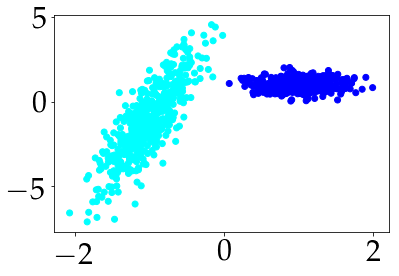

In [224]:
d = gen_arti(data_type = 0,
             cov2 = np.array([[0.1, 0.5], [0.5, 4]]))
dx = d[0]

plt.scatter(dx[:, 0], dx[:, 1], color = np.array(COLS)[d[1].astype(int)]);
np.save(d)

In [ ]:
df = pd.DataFrame(data = dx, columns = ["x", "y"])
df.to_csv("double_mixture_data.csv", sep = ' ', header = False, index = False)
df

In [ ]:
n_iter = 10000

# Train data
datax = dx
K = 2

# List to save results
likelihood = []
Cen = {key: [] for key in range(K)}
Sigma = {key: [] for key in range(K)}

# Iterate over n_iter times
for k in tqdm(range(int(n_iter))):
    classifier = GM(K)
    # Fit the classifier
    classifier.fit(datax)
    A = classifier.q.argmax(axis = 0).astype(int)
    C = classifier.mu.reshape(K, 2)
    for i,j in enumerate(np.arctan2(C[:, 0], C[:, 1]).argsort()):
        Cen[i].append(C[j])
        Sigma[i].append(classifier.sigma[j])
        
    likelihood.append(classifier.L[-1])

print ("Moyenne de vraissemblance : {} - et écart-type : {}"\
       .format(np.mean(likelihood),np.std(likelihood)))
for k in Cen.keys():
    Cen[k] = np.array(Cen[k])
    print ("----- Centroide 1 -----")
    print ("moyenne  : {}\nécart-type : {}"\
       .format(np.mean(Cen[k], axis = 0), np.std(Cen[k], axis = 0)))

 65%|██████▍   | 6464/10000 [01:03<00:34, 101.66it/s]

In [ ]:
# Better result = better likelihood
best = np.array(likelihood).argmax()

# Dictionary of best parameters
best_params = {"mu" : np.array([Cen[i][best] for i in Cen.keys()]),
               "sigma": np.array([Sigma[i][best] for i in Sigma.keys()])}

# Save in binary file
np.save("double_mixture_parameters", best_params)